In [1]:
from fastai.vision.all import *
from fastai.callback.wandb import *
import wandb

In [2]:
path = Path('./data/')

In [3]:
block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label, item_tfms=[Resize(384)],
        batch_tfms=aug_transforms(mult=1.5, size=384, min_scale=0.75))

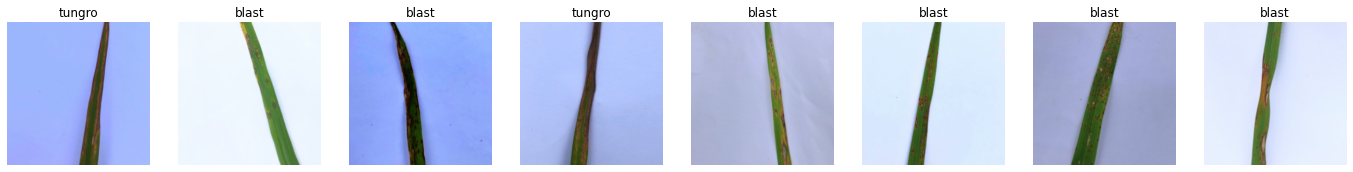

In [4]:
dls = block.dataloaders(path, bs=8)
dls.train.show_batch(max_n=8, nrows=1)

In [24]:
from timm import create_model
import timm
timm.list_models('*mobile*', pretrained=True)

['convit_base',
 'convit_small',
 'convit_tiny',
 'crossvit_9_240',
 'crossvit_9_dagger_240',
 'crossvit_15_240',
 'crossvit_15_dagger_240',
 'crossvit_15_dagger_408',
 'crossvit_18_240',
 'crossvit_18_dagger_240',
 'crossvit_18_dagger_408',
 'crossvit_base_240',
 'crossvit_small_240',
 'crossvit_tiny_240',
 'levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_384',
 'mobilevit_s',
 'mobilevit_xs',
 'mobilevit_xxs',
 'vit_base_patch8_224',
 'vit_base_patch8_224_dino',
 'vit_base_patch8_224_in21k',
 'vit_base_patch16_224',
 'vit_base_patch16_224_dino',
 'vit_base_patch16_224_in21k',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_224_miil_in21k',
 'vit_base_patch16_224_sam',
 'vit_base_patch16_384',
 'vit_base_patch32_224',
 'vit_base_patch32_224_in21k',
 'vit_base_patch32_224_sam',
 'vit_base_patch32_384',
 'vit_base_r50_s16_224_in21k',
 'vit_base_r50_s16_384',
 'vit_huge_patch14_224_in21k',
 'vit_large_patch16_224',
 'vit_large_patch16_224_in21k',
 'vit_large_patch16_384',

In [25]:
model = create_model('convit_tiny', pretrained=True, num_classes=dls.c)
learn = Learner(dls, model, metrics=accuracy, loss_func=LabelSmoothingCrossEntropyFlat())

In [26]:
learn.lr_find()

AssertionError: Input image height (384) doesn't match model (224).

In [ ]:
learn.fine_tune(10, 3e-4, freeze_epochs=1, cbs=[WandbCallback(log_preds=False), SaveModelCallback(), ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,time
0,1.046396,0.948548,0.958333,00:09


Better model found at epoch 0 with valid_loss value: 0.9485482573509216.


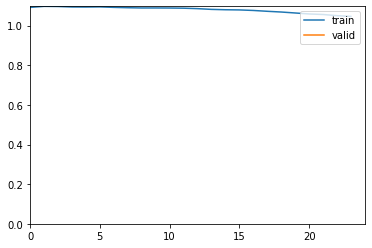

epoch,train_loss,valid_loss,accuracy,time
0,0.886664,0.840501,0.937500,00:10
1,0.802558,0.663027,0.937500,00:09
2,0.690970,0.484744,0.958333,00:09
3,0.625138,0.435626,0.979167,00:09
4,0.563751,0.377589,0.979167,00:09
5,0.489571,0.353911,0.979167,00:09
6,0.472162,0.355558,0.979167,00:09
7,0.438944,0.354416,0.979167,00:09
8,0.432557,0.339893,0.979167,00:09
9,0.416827,0.343304,0.979167,00:09


Better model found at epoch 0 with valid_loss value: 0.8405008316040039.


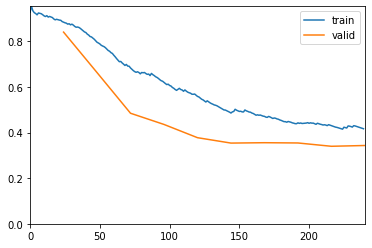

Better model found at epoch 1 with valid_loss value: 0.6630268096923828.
Better model found at epoch 2 with valid_loss value: 0.48474419116973877.
Better model found at epoch 3 with valid_loss value: 0.43562594056129456.
Better model found at epoch 4 with valid_loss value: 0.37758874893188477.
Better model found at epoch 5 with valid_loss value: 0.3539113700389862.
Better model found at epoch 8 with valid_loss value: 0.3398926258087158.



accuracy,▄▁▁▄███████
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▂▃▆█▂▂▂▂▃▃▄▄▄▄▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁
mom_0,█▇▃▁██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▂▃▃▄▄▅▅▅▆▆▇▇▇▇████
raw_loss,███▇▆▆▇▅▅▅▄▄▄▃▄▂▃▃▄▂▆▁▁▂▁▁▃▁▃▄▁▂▂▃▂▃▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,████▆▆▆▆▆▅▅▅▄▄▄▃▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
valid_loss,█▇▅▃▂▁▁▁▁▁▁
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.97917


In [13]:
with wandb.init(project="leaf-disease-blogpost", name="mobilevit_s"):
    learn.fine_tune(10, 3e-4, freeze_epochs=1, cbs=[WandbCallback(log_preds=False), SaveModelCallback(), ShowGraphCallback()])

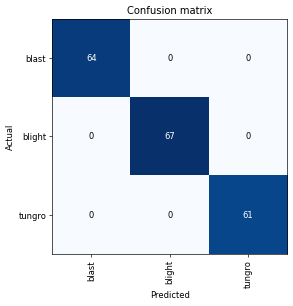

In [14]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls.train)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

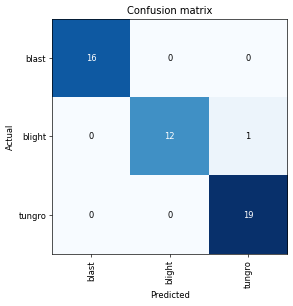

In [15]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls.valid)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [16]:
interp.print_classification_report()

              precision    recall  f1-score   support

       blast       1.00      1.00      1.00        16
      blight       1.00      0.92      0.96        13
      tungro       0.95      1.00      0.97        19

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



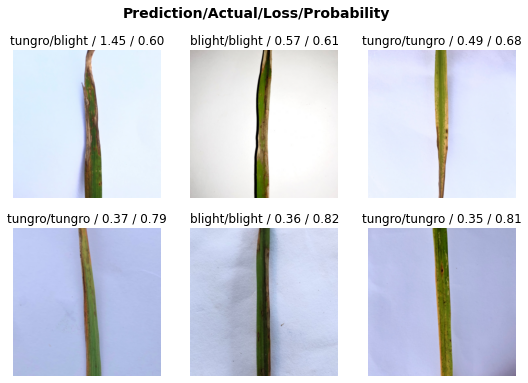

In [17]:
interp.plot_top_losses(k=6)

In [18]:
learn.load("model")
learn.export("models/learner.pkl")

/home/dnth/anaconda3/envs/rice-blog/lib/python3.8/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")
